<a href="https://colab.research.google.com/github/nargyanti/IPCV_Genap_2022/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [230]:
def convolution2d(image, kernel, stride = 1, padding = 0):    
  # Get output shape
  x_output = int(((image.shape[0] + 2*padding - kernel.shape[0]) / stride) + 1)
  y_output = int(((image.shape[1] + 2*padding - kernel.shape[1]) / stride) + 1)
  filtered_image = np.zeros((x_output, y_output))       
  
  # Convolutional
  for x in range(image.shape[0] - kernel.shape[0]):        
    if x % stride == 0:
      for y in range(image.shape[1] - kernel.shape[1]):
        if y % stride == 0:
          filtered_image[x, y] = np.sum(image[x:x+kernel.shape[0], y:y+kernel.shape[0]] * kernel)
                
  # Create padding for image
  if padding != 0:
    result = np.zeros((filtered_image.shape[0] + padding*2, filtered_image.shape[1] + padding*2))
    result[padding:(-1*padding), padding:(-1*padding)] = filtered_image
  else:
    result = filtered_image

  return result

In [243]:
img = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

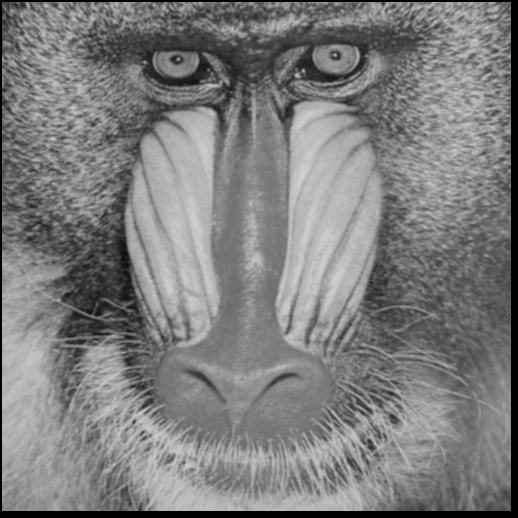

In [238]:
# Average filtering
kernel_average = np.array([[1,1,1],
                           [1,1,1],
                           [1,1,1]]) * 1/9

img_average = convolution2d(img_gray, kernel_average, 1, 2)
cv2_imshow(img_average)

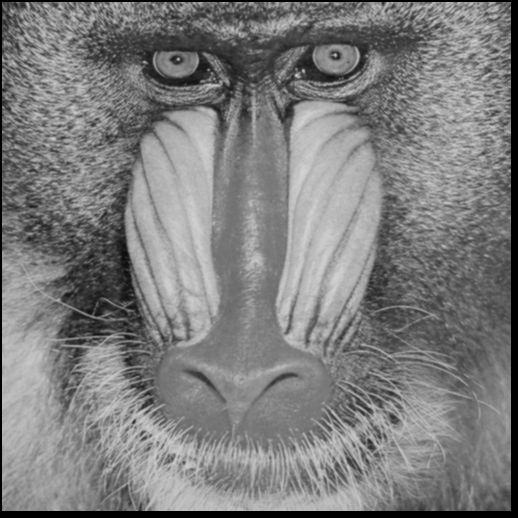

In [240]:
# High pass filtering
kernel_high_pass = np.array([[1,1,1],
                           [1,4,1],
                           [1,1,1]]) * 1/12

img_high_pass = convolution2d(img_gray, kernel_high_pass, 1, 2)
cv2_imshow(img_high_pass)

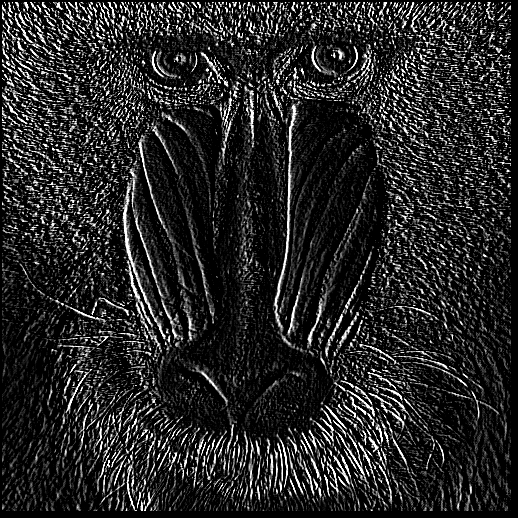

In [242]:
# Low pass filtering
kernel_low_pass = np.array([[-1,0,1],
                           [-1,0,3],
                           [-3,0,1]])

img_low_pass = convolution2d(img_gray, kernel_low_pass, 1, 2)
cv2_imshow(img_low_pass)

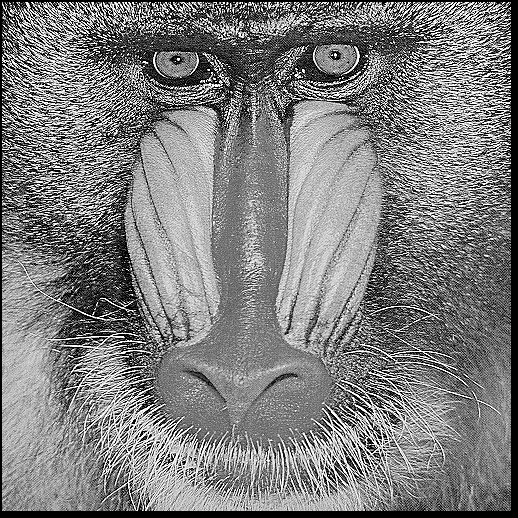

In [231]:
# Sharpen filtering
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

img_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)
cv2_imshow(img_sharpen)

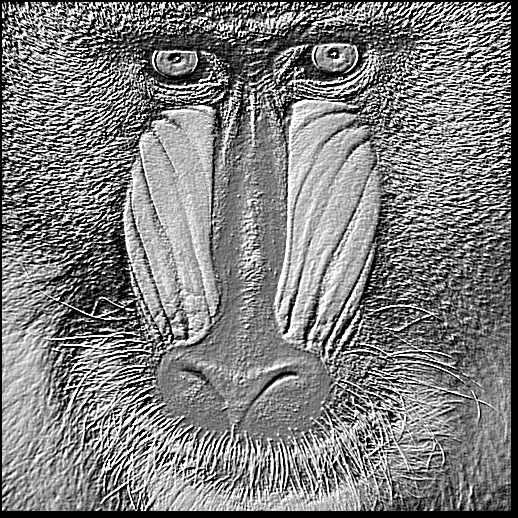

In [232]:
# Emboss filtering
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

img_emboss = convolution2d(img_gray, kernel_emboss, 1, 2)

cv2_imshow(img_emboss)

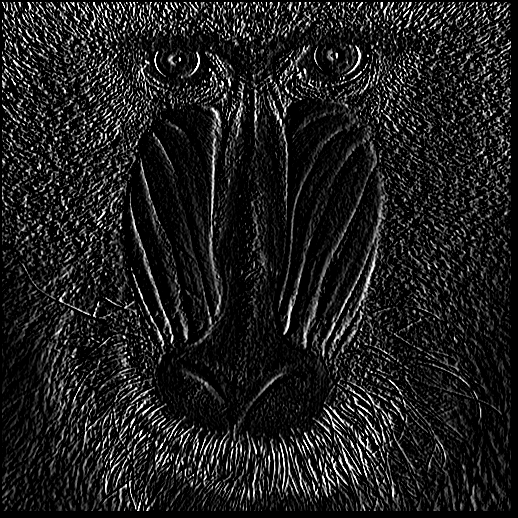

In [233]:
# Left sobel edge detection filtering
kernel_left_sobel = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

img_left_sobel = convolution2d(img_gray, kernel_left_sobel, 1, 2)

cv2_imshow(img_left_sobel)

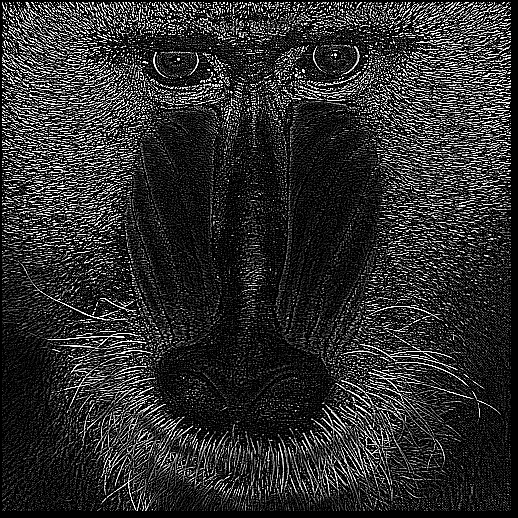

In [234]:
# Canny edge detection filtering
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

img_canny = convolution2d(img_gray, kernel_canny, 1, 2)

cv2_imshow(img_canny)

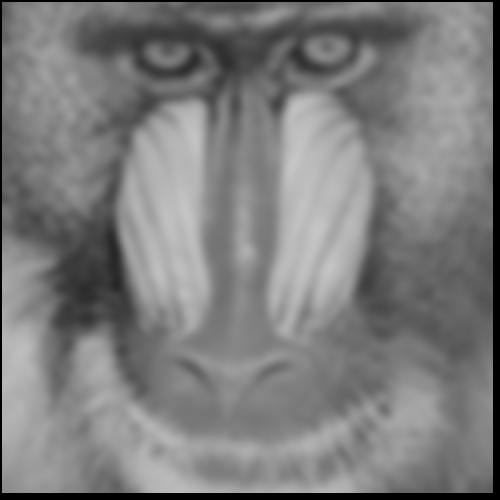

In [244]:
# Gaussian blur filtering
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

img_gaussian = convolution2d(img_gray, gauss_kernel, 1, 2)

cv2_imshow(img_gaussian)